# WeatherPy by Sherwin Macalintal
----
#Analysis: 
#1.The data on the City Latitude vs. Max Temperature clearly exhibits a parabolic curve, meaning the data is quadratic follows a quadratic model. This is because the equator which is at 0 Lat serves as the maximum of the parabola, which in effect record the highest maximum temperature.
#2.City Latitude vs. Humidity graph looks like two similar regions separated by the equator. It shows the wide range of humidity values above the equator is mirror below while the area near the equator are more clump or group on the higher values as expected due to closer proximity to the sun.
#3. Observation on City Latitude vs. Humidity graph is also evident on the City Latitude vs. Wind Speed on reverse. This is expected as wind speed is inversely related with the humidity. As it gets more humid the air gets denser thus, slower speed.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

import openweathermapy.core as owm


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

647

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
settings = {"units":"imperial","appid":api_key}

info = []
views = {"summary":["name","sys.country","dt","coord.lon","coord.lat","main.humidity","clouds.all","main.temp_max", "wind.speed"]}
# Get data for each city in the cities_df

print("------------------------")
print("Beginning Data Retrieval")
print("------------------------")

i = 0

for city in cities:
    i = i + 1
    try:
        data = owm.get_current(city,**settings)
        info.append(data.get_dict(views["summary"], split_keys=True))
        print (f"processing record {i} for {city}")
    except:
        print(f"record {i} not available for {city}")
    
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

------------------------
Beginning Data Retrieval
------------------------
processing record 1 for san juan nepomuceno
processing record 2 for qaanaaq
processing record 3 for cape town
processing record 4 for chingirlau
processing record 5 for bluff
record 6 not available for tsihombe
record 7 not available for ust-bolsheretsk
record 8 not available for selishche
processing record 9 for roald
processing record 10 for la asuncion
processing record 11 for maranello
record 12 not available for marcona
record 13 not available for urtaaul
processing record 14 for mataura
processing record 15 for barrow
processing record 16 for chuy
processing record 17 for vila franca do campo
processing record 18 for jamestown
processing record 19 for butaritari
processing record 20 for truth or consequences
processing record 21 for abatskoye
processing record 22 for mahebourg
processing record 23 for laurel
processing record 24 for yellowknife
processing record 25 for lima
record 26 not available for belu

processing record 232 for grindavik
record 233 not available for khormuj
processing record 234 for yeniseysk
record 235 not available for sentyabrskiy
processing record 236 for katakwi
processing record 237 for vestmannaeyjar
record 238 not available for raga
processing record 239 for nurota
record 240 not available for bajo baudo
processing record 241 for salinopolis
processing record 242 for mansehra
record 243 not available for grand river south east
processing record 244 for severo-kurilsk
processing record 245 for homer
processing record 246 for luderitz
processing record 247 for saldanha
processing record 248 for fortuna
record 249 not available for abiy adi
record 250 not available for samusu
processing record 251 for mount gambier
processing record 252 for saint-augustin
processing record 253 for fuling
processing record 254 for shimoda
processing record 255 for nova olimpia
processing record 256 for seydi
processing record 257 for bethel
record 258 not available for samalaeulu

processing record 461 for sandusky
processing record 462 for porto novo
processing record 463 for bathsheba
processing record 464 for north battleford
processing record 465 for lubumbashi
processing record 466 for bontang
processing record 467 for pedra azul
processing record 468 for bima
processing record 469 for ranau
processing record 470 for belyy yar
processing record 471 for moletai
processing record 472 for isiro
processing record 473 for moyale
processing record 474 for nanakuli
processing record 475 for machiques
processing record 476 for tarnogskiy gorodok
processing record 477 for kilgore
processing record 478 for boueni
processing record 479 for millau
processing record 480 for sambava
record 481 not available for qui nhon
processing record 482 for takoradi
processing record 483 for winneba
processing record 484 for iqaluit
processing record 485 for marsh harbour
processing record 486 for sawakin
processing record 487 for atar
processing record 488 for bartica
processing re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df = pd.DataFrame(info)
df.columns = ["City","Country","Date","Lon", "Lat","Humidity", "Cloudiness", "Max Temp", "Wind Speed"]
df.head()

,City,Country,Date,Lon,Lat,Humidity,Cloudiness,Max Temp,Wind Speed
0,San Juan Nepomuceno,CO,1570416638,-75.08,9.95,82,0,78.06,1.86
1,Qaanaaq,GL,1570416638,-69.36,77.48,77,100,19.87,17.16
2,Cape Town,ZA,1570416639,18.42,-33.93,93,75,59.00,4.70
3,Chingirlau,KZ,1570416639,54.08,51.09,36,70,48.69,11.36
4,Bluff,AU,1570416639,149.07,-23.58,17,0,94.17,6.20


In [5]:
df.to_csv(r'\cities.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

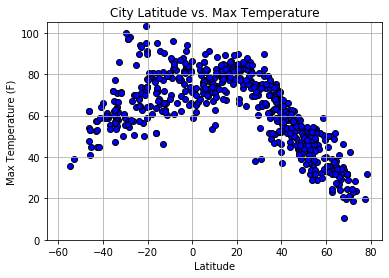

In [6]:
plt.scatter(df.Lat, df["Max Temp"], marker="o", facecolors="blue", edgecolors="black")

plt.ylim(0,105)
plt.xlim(-65,85)

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid()

#### Latitude vs. Humidity Plot

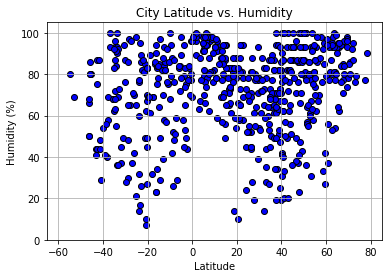

In [7]:
plt.scatter(df.Lat, df.Humidity, marker="o", facecolors="blue", edgecolors="black")

plt.ylim(0,105)
plt.xlim(-65,85)

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid()

#### Latitude vs. Cloudiness Plot

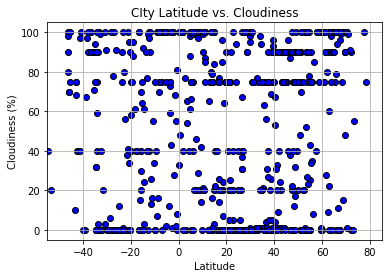

In [8]:
plt.scatter(df.Lat, df.Cloudiness, marker="o", facecolors="blue", edgecolors="black")

plt.ylim(-5,105)
plt.xlim(-55,85)

plt.title("CIty Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid()

#### Latitude vs. Wind Speed Plot

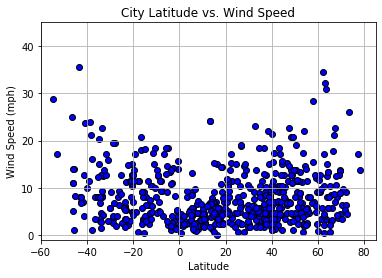

In [9]:
plt.scatter(df.Lat, df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")

plt.ylim(-1,45)
plt.xlim(-60,85)

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid()